In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import tree
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *# This Python 3 environment comes with many helpful analytics libraries installed
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("data.csv")
df.head().style.background_gradient("RdPu")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.000000,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.000000,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.000000,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.000000,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.000000,?,?,?,0


In [ ]:
df.describe().T.style.background_gradient("Wistia")


,count,mean,std,min,25%,50%,75%,max
age,294.000000,47.826531,7.811812,28.000000,42.000000,49.000000,54.000000,66.000000
sex,294.000000,0.724490,0.447533,0.000000,0.000000,1.000000,1.000000,1.000000
cp,294.000000,2.982993,0.965117,1.000000,2.000000,3.000000,4.000000,4.000000
oldpeak,294.000000,0.586054,0.908648,0.000000,0.000000,0.000000,1.000000,5.000000
num,294.000000,0.360544,0.480977,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [ ]:
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset has 294 rows and 14 columns


In [ ]:
df.isna().sum()


age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [ ]:
df['chol'].value_counts()


?      23
275     5
246     5
230     5
238     4
       ..
468     1
259     1
100     1
210     1
393     1
Name: chol, Length: 154, dtype: int64

In [ ]:
df.replace('?', np.nan, inplace=True)


In [ ]:
df['chol'].value_counts()


246    5
230    5
275    5
238    4
196    4
      ..
468    1
259    1
100    1
210    1
393    1
Name: chol, Length: 153, dtype: int64

In [ ]:
df.rename(columns ={'num       ': 'target'},inplace=True)


In [ ]:
df.isna().sum()


age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64

In [ ]:
missing_data = ((df.isna().sum()/df.shape[0])*100).round(2)

missing_data = pd.DataFrame(missing_data)
missing_data.style.background_gradient(cmap = 'Greens')

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,0.340000
chol,7.820000
fbs,2.720000
restecg,0.340000
thalach,0.340000
exang,0.340000
oldpeak,0.000000


In [ ]:
for i in ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang','ca','thal','slope']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df.copy()
X = data.iloc[:,0:13]  #independent columns
Y = data.iloc[:,-1]    #target column

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
4       chol  218.436721
7    thalach  128.895241
9    oldpeak  122.921960
8      exang   70.046164
2         cp   23.412219
3   trestbps   13.687994
0        age    9.488843
5        fbs    7.268175
1        sex    6.027182
6    restecg    0.291753
10     slope    0.185381
12      thal    0.127332


In [ ]:
df.drop(columns = ['ca','thal','slope'],inplace = True)


In [ ]:
len(df.columns)

11

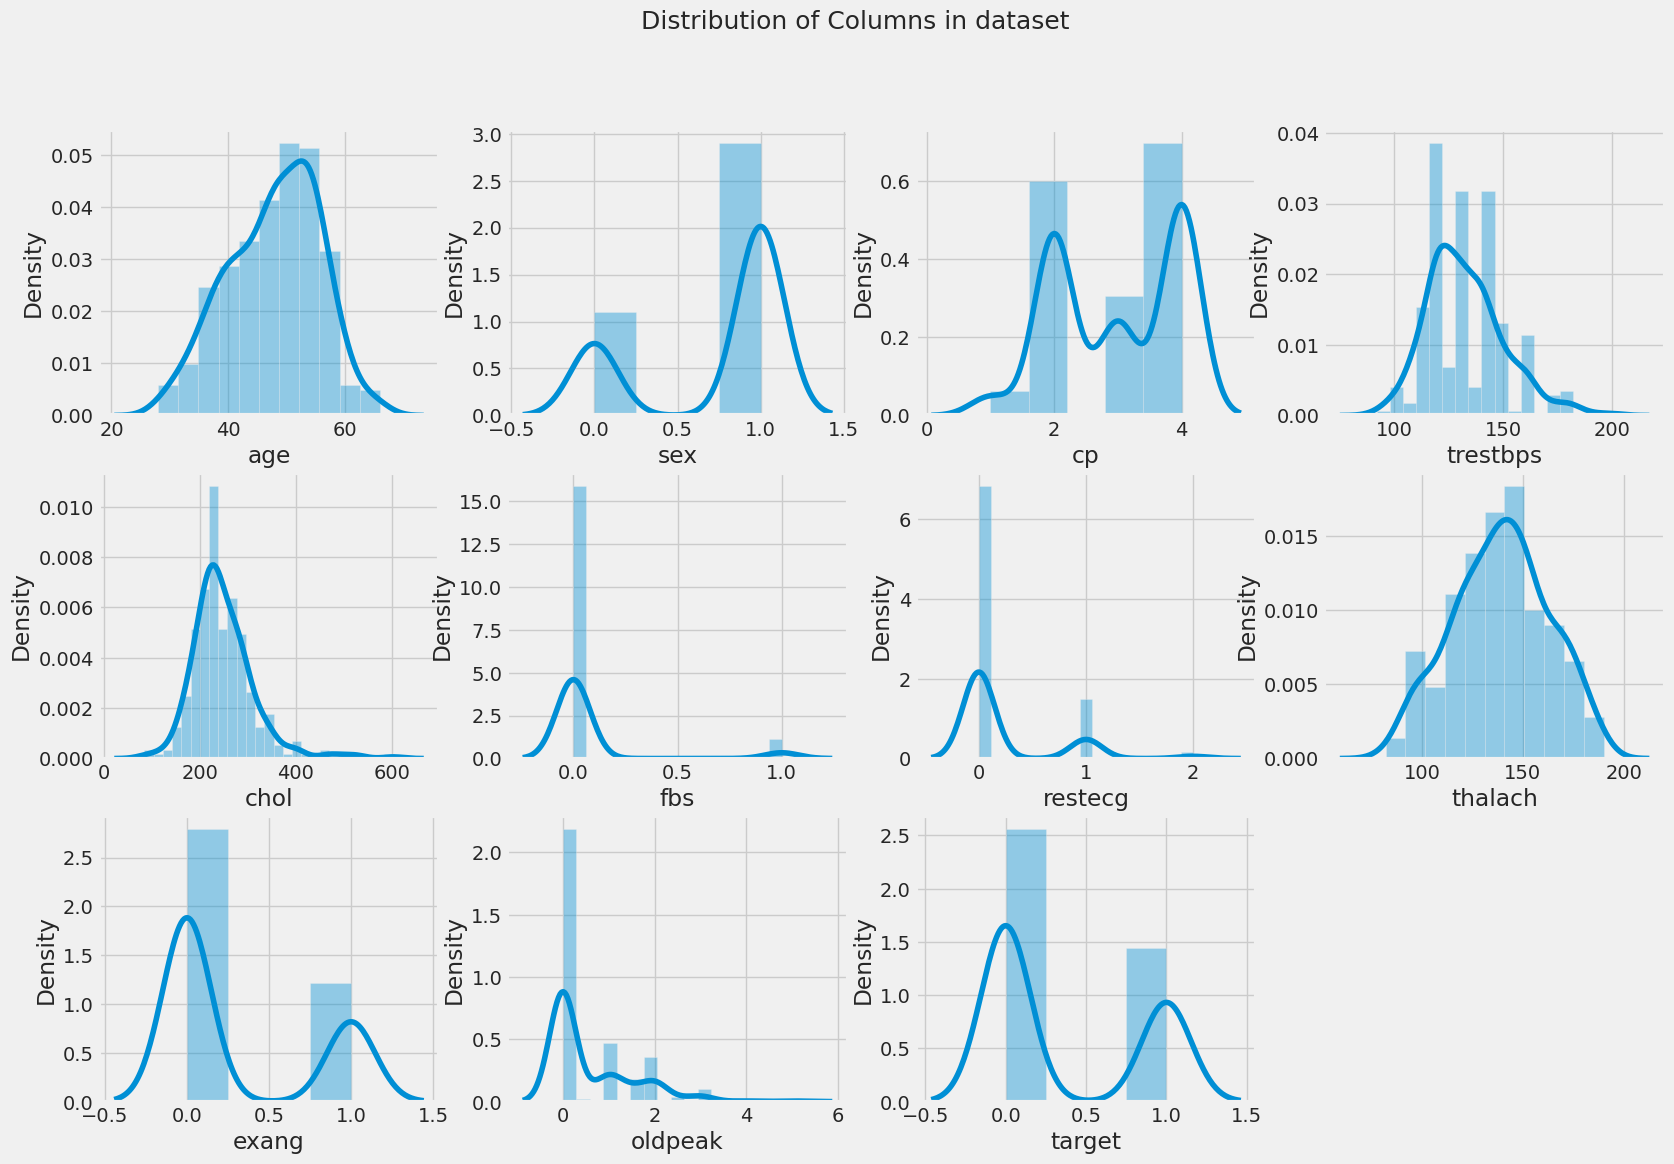

In [ ]:
plt.rcParams['figure.figsize'] = (18, 12)
plt.style.use('fivethirtyeight')

for i,feature in enumerate(df.columns):
    plt.subplot(3,4,i+1)
    sns.distplot(df[feature])
    plt.xlabel(feature)

plt.suptitle('Distribution of Columns in dataset', fontsize = 18)
plt.show()

In [ ]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['target'] = df['target'].astype('object')
df['oldpeak'] = df['oldpeak'].astype('object')
df['exang'] = df['exang'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['fbs'] = df['fbs'].astype('object')

df['trestbps'] = df['trestbps'].astype('int64')
df['chol'] = df['chol'].astype('int64')
df['thalach'] = df['thalach'].astype('int64')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       294 non-null    int64 
 1   sex       294 non-null    object
 2   cp        294 non-null    object
 3   trestbps  294 non-null    int64 
 4   chol      294 non-null    int64 
 5   fbs       294 non-null    object
 6   restecg   294 non-null    object
 7   thalach   294 non-null    int64 
 8   exang     294 non-null    object
 9   oldpeak   294 non-null    object
 10  target    294 non-null    object
dtypes: int64(4), object(7)
memory usage: 25.4+ KB


In [ ]:
cat_cols = []
num_cols = []
for i in df.columns:
    if df[i].dtype == 'object' or i == 'num':
        cat_cols.append(i)
    else:
        num_cols.append(i)
print(f"The categorical columns in a dataset are : {cat_cols}")
print("--"*62)
print(f"The Numerical columns in a dataset are : {num_cols}")

The categorical columns in a dataset are : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'target']
----------------------------------------------------------------------------------------------------------------------------
The Numerical columns in a dataset are : ['age', 'trestbps', 'chol', 'thalach']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for column in cat_cols:
    df[column] = label.fit_transform(df[column])

In [ ]:
x = df.drop('target', axis=1)
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf,x_train , y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)

#print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Test Result:
Accuracy Score: 75.28%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.842105   0.593750  0.752809   0.717928      0.763971
recall      0.786885   0.678571  0.752809   0.732728      0.752809
f1-score    0.813559   0.633333  0.752809   0.723446      0.756859
support    61.000000  28.000000  0.752809  89.000000     89.000000
_______________________________________________
Confusion Matrix: 
 [[48 13]
 [ 9 19]]



In [ ]:
from sklearn.ensemble import RandomForestClassifier

tree_clf = RandomForestClassifier(random_state=42)
tree_clf.fit(x_train, y_train)

#print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Test Result:
Accuracy Score: 84.27%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.885246   0.75  0.842697   0.817623      0.842697
recall      0.885246   0.75  0.842697   0.817623      0.842697
f1-score    0.885246   0.75  0.842697   0.817623      0.842697
support    61.000000  28.00  0.842697  89.000000     89.000000
_______________________________________________
Confusion Matrix: 
 [[54  7]
 [ 7 21]]



In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(x_train, y_train)

#print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(svc, x_train, y_train, x_test, y_test, train=False)

Test Result:
Accuracy Score: 73.03%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.717647   1.000000  0.730337   0.858824      0.806477
recall      1.000000   0.142857  0.730337   0.571429      0.730337
f1-score    0.835616   0.250000  0.730337   0.542808      0.651378
support    61.000000  28.000000  0.730337  89.000000     89.000000
_______________________________________________
Confusion Matrix: 
 [[61  0]
 [24  4]]



In [ ]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train, y_train)
print_score(gb, x_train, y_train, x_test, y_test, train=False)

Test Result:
Accuracy Score: 78.65%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.903846   0.621622  0.786517   0.762734      0.815056
recall      0.770492   0.821429  0.786517   0.795960      0.786517
f1-score    0.831858   0.707692  0.786517   0.769775      0.792795
support    61.000000  28.000000  0.786517  89.000000     89.000000
_______________________________________________
Confusion Matrix: 
 [[47 14]
 [ 5 23]]



In [ ]:
import pickle
filename = 'gaussian_model.pkl'
with open(filename,'wb') as file:
  pickle.dump(gb,file)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       294 non-null    int64
 1   sex       294 non-null    int64
 2   cp        294 non-null    int64
 3   trestbps  294 non-null    int64
 4   chol      294 non-null    int64
 5   fbs       294 non-null    int64
 6   restecg   294 non-null    int64
 7   thalach   294 non-null    int64
 8   exang     294 non-null    int64
 9   oldpeak   294 non-null    int64
 10  target    294 non-null    int64
dtypes: int64(11)
memory usage: 25.4 KB


In [ ]:
import torch
X = torch.from_numpy(df.drop("target",axis=1).values).type(torch.float)
y = torch.from_numpy(df.target.values).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state = 42)

X.shape,y.shape

(torch.Size([294, 10]), torch.Size([294]))

In [ ]:
class ModelV0(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.layer = torch.nn.Sequential(
        torch.nn.Linear(in_features = 10,out_features = 5),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features = 5, out_features = 3),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features = 3,out_features = 1)
    )

  def forward(self,x):
    return torch.sigmoid(self.layer(x))

model = ModelV0()


In [ ]:
model.state_dict()

OrderedDict([('layer.0.weight',
              tensor([[ 0.0640, -0.2948,  0.3091,  0.1142, -0.1864, -0.2331, -0.1547,  0.1580,
                       -0.3145,  0.2172],
                      [-0.0735, -0.2725, -0.1079,  0.3151,  0.2513, -0.1363,  0.0883,  0.1004,
                       -0.3105, -0.0610],
                      [-0.1529, -0.3146,  0.0794, -0.1743, -0.2510, -0.2037, -0.2592,  0.0981,
                       -0.2008, -0.2227],
                      [ 0.0771,  0.1667,  0.1785, -0.2392, -0.0353, -0.1389,  0.2757, -0.1461,
                        0.0317, -0.0981],
                      [-0.0578,  0.2676, -0.2082,  0.2847,  0.2368, -0.0688,  0.2830, -0.3132,
                       -0.3091, -0.2510]])),
             ('layer.0.bias',
              tensor([ 0.2604, -0.1750,  0.0201, -0.0613,  0.1487])),
             ('layer.2.weight',
              tensor([[ 0.4343,  0.3440,  0.4457,  0.3782, -0.2760],
                      [ 0.3474,  0.3745,  0.3576,  0.4186,  0.3624],
          

In [ ]:
with torch.inference_mode():
  untrained_preds = model(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 Labels:\n{y_test[:10]}")

Length of predictions: 59, Shape: torch.Size([59, 1])
Length of test samples: 59, Shape: torch.Size([59, 10])

First 10 predictions:
tensor([[0.0434],
        [0.0242],
        [0.0212],
        [0.0569],
        [0.0299],
        [0.0319],
        [0.0378],
        [0.0439],
        [0.0469],
        [0.0414]])

First 10 Labels:
tensor([0., 0., 0., 1., 1., 0., 0., 1., 0., 0.])


In [ ]:
loss_fn = torch.nn.BCELoss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01,
                            )

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  return (correct/len(y_pred))*100


In [ ]:
epochs = 1000

for epoch in range(epochs):
  model.train()

  y_pred = torch.round(model(X_train).squeeze())

  loss = loss_fn(y_pred,
                 y_train)

  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)


  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_pred = torch.round(model(X_test).squeeze())

    test_loss = loss_fn(test_pred,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)


  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}  | Test Acc : {test_acc:}%")



Epoch: 0 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
Epoch: 100 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
Epoch: 200 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
Epoch: 300 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
Epoch: 400 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
Epoch: 500 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
Epoch: 600 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
Epoch: 700 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
Epoch: 800 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
Epoch: 900 | Loss: 36.17021, Acc: 63.83% | Test Loss: 35.59322  | Test Acc : 64.40677966101694%
